In [1]:
# Three Observable Trends
# 1. The temperature increases as you approach the equator with peaks at -20 degrees and 20 degrees.
# 2. Just below the equator from 0 to -20 there no points with low humidity suggesting this is a very humid region. 
# 3. Cloudiness doesn't seem to have much relationship to latitude. Almost all latitudes had points with various levels of cloudiness. 

In [2]:
# Import dependencies and set keys
import requests
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import seaborn as sns
import random
import numpy as np

url = "api.openweathermap.org/data/2.5/weather?"
api_key = "1554a148a00535035214c4ce3c74a8c7"
units = "metric"

In [3]:
#Import the global cities csv, make a dataframe, and take a random sampling.
worldcities_df = pd.read_csv("worldcities.csv")
worldcities_df.head()
random_sample_df = worldcities_df.sample(n=500)
random_sample_df

,Country,City,Latitude,Longitude
19616,in,tiruchchendur,8.483333,78.116667
11349,fr,andresy,48.982345,2.056872
38009,ru,sayansk,54.108800,102.164800
36570,ru,krasnoobsk,54.919800,82.990900
29252,ph,new panay,6.758611,124.589167
22483,lu,biwer,49.702778,6.374722
1042,az,yevlax,40.612732,47.142329
46600,za,greytown,-29.064155,30.592786
18847,in,nuh,28.116667,77.016667
9329,de,mulheim-karlich,50.383333,7.500000


In [4]:
# Define Lists
temp = []
humidity = []
wind = []
cloudiness = []
open_weather_city_number = []
process_number = 0

# Query the API with Coordinates and create lists with Temperature, Humidity, Wind Speed, and Cloudiness Info.

for index, row in random_sample_df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    query = f"http://{url}APPID={api_key}&lat={lat}&lon={lon}&units={units}"
    response = requests.get(query).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    wind.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    open_weather_city_number.append(response['id'])
    process_number = process_number + 1
    print(f"{process_number}: Currently processing the city with the following information:")
    print(f"City ID Number: {response['id']}")
    print(f"City Name: {row.City}")
    print(f"Query url: {query}")


1: Currently processing the city with the following information:
City ID Number: 1254390
City Name: tiruchchendur
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=8.483333&lon=78.116667&units=metric
2: Currently processing the city with the following information:
City ID Number: 3037692
City Name: andresy
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.982345&lon=2.0568720000000003&units=metric
3: Currently processing the city with the following information:
City ID Number: 2055166
City Name: sayansk
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=54.1088&lon=102.1648&units=metric
4: Currently processing the city with the following information:
City ID Number: 1502091
City Name: krasnoobsk
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=54.9198&lon=82.9909&units=metric
5: Cur

34: Currently processing the city with the following information:
City ID Number: 3532254
City Name: berriozabal
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=16.8&lon=-93.266667&units=metric
35: Currently processing the city with the following information:
City ID Number: 229380
City Name: masaka
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=-0.3127778&lon=31.713055600000004&units=metric
36: Currently processing the city with the following information:
City ID Number: 699956
City Name: nyzhnya krynka
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.113496999999995&lon=38.160636&units=metric
37: Currently processing the city with the following information:
City ID Number: 690545
City Name: uzyn
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=49.826188&lon=30.4148739999999

67: Currently processing the city with the following information:
City ID Number: 3071330
City Name: luzice
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.83974&lon=17.07035&units=metric
68: Currently processing the city with the following information:
City ID Number: 4840844
City Name: plymouth
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=41.671944399999994&lon=-73.05333329999999&units=metric
69: Currently processing the city with the following information:
City ID Number: 1344069
City Name: contai
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=21.778610999999998&lon=87.75361099999999&units=metric
70: Currently processing the city with the following information:
City ID Number: 6555428
City Name: neuhausen
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.683333000000

100: Currently processing the city with the following information:
City ID Number: 3073149
City Name: kostelec nad orlici
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=50.123826&lon=16.211445&units=metric
101: Currently processing the city with the following information:
City ID Number: 682707
City Name: caraula
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=44.183333000000005&lon=23.25&units=metric
102: Currently processing the city with the following information:
City ID Number: 2738224
City Name: lordelo
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=41.234507&lon=-8.402969&units=metric
103: Currently processing the city with the following information:
City ID Number: 3075744
City Name: hlubocky
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=49.628217&lon=17.403569&unit

133: Currently processing the city with the following information:
City ID Number: 1727233
City Name: gamay
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=12.3638&lon=125.2366&units=metric
134: Currently processing the city with the following information:
City ID Number: 2743076
City Name: alhadas
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=40.186071999999996&lon=-8.790567999999999&units=metric
135: Currently processing the city with the following information:
City ID Number: 3564178
City Name: ciego de avila
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=21.84&lon=-78.7619444&units=metric
136: Currently processing the city with the following information:
City ID Number: 5394086
City Name: seal beach
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=33.7413889&lon=-118.1038

166: Currently processing the city with the following information:
City ID Number: 4003737
City Name: juchitlan
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=20.083333&lon=-104.116667&units=metric
167: Currently processing the city with the following information:
City ID Number: 5284283
City Name: colchester
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=41.5755556&lon=-72.3325&units=metric
168: Currently processing the city with the following information:
City ID Number: 2623441
City Name: brejning
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=55.6613&lon=9.677033999999999&units=metric
169: Currently processing the city with the following information:
City ID Number: 592279
City Name: kaardi
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=58.2080556&lon=26.411388899999995

199: Currently processing the city with the following information:
City ID Number: 3584264
City Name: nueva esparta
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=13.7836111&lon=-87.8386111&units=metric
200: Currently processing the city with the following information:
City ID Number: 573709
City Name: bolshoye ignatovo
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=55.020728000000005&lon=45.575911&units=metric
201: Currently processing the city with the following information:
City ID Number: 1255396
City Name: supaul
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=26.116667&lon=86.6&units=metric
202: Currently processing the city with the following information:
City ID Number: 2365560
City Name: kpalime
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=6.9&lon=0.63333330000000

232: Currently processing the city with the following information:
City ID Number: 2857900
City Name: oerlinghausen
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=51.966667&lon=8.666667&units=metric
233: Currently processing the city with the following information:
City ID Number: 2966794
City Name: balbriggan
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=53.612777799999996&lon=-6.1819444&units=metric
234: Currently processing the city with the following information:
City ID Number: 1263983
City Name: mamit
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=23.933332999999998&lon=92.483333&units=metric
235: Currently processing the city with the following information:
City ID Number: 2938284
City Name: demmin
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=53.9&lon=13.033333&un

265: Currently processing the city with the following information:
City ID Number: 1529528
City Name: kuytun
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=44.416667&lon=85.0&units=metric
266: Currently processing the city with the following information:
City ID Number: 4010155
City Name: el coyote
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=25.7&lon=-103.266667&units=metric
267: Currently processing the city with the following information:
City ID Number: 1714309
City Name: duenas
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=11.0672&lon=122.6191&units=metric
268: Currently processing the city with the following information:
City ID Number: 766332
City Name: lezajsk
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=50.260132&lon=22.421242000000003&units=metric
269: Curren

298: Currently processing the city with the following information:
City ID Number: 3023924
City Name: conflans-sainte-honorine
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=49.001575&lon=2.0969450000000003&units=metric
299: Currently processing the city with the following information:
City ID Number: 3575975
City Name: all saints
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=17.05&lon=-61.8&units=metric
300: Currently processing the city with the following information:
City ID Number: 1690033
City Name: san fernando
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=16.618610999999998&lon=120.31944399999999&units=metric
301: Currently processing the city with the following information:
City ID Number: 4898182
City Name: kankakee
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=

331: Currently processing the city with the following information:
City ID Number: 1357699
City Name: badah
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=27.333333000000003&lon=68.016667&units=metric
332: Currently processing the city with the following information:
City ID Number: 1728792
City Name: bail
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=16.2768&lon=120.4209&units=metric
333: Currently processing the city with the following information:
City ID Number: 3164440
City Name: viadana
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=44.933333000000005&lon=10.516667&units=metric
334: Currently processing the city with the following information:
City ID Number: 3178283
City Name: cologno monzese
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=45.533333&lon=9.283333&unit

364: Currently processing the city with the following information:
City ID Number: 4174855
City Name: tarpon springs
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=28.1458333&lon=-82.7569444&units=metric
365: Currently processing the city with the following information:
City ID Number: 2994534
City Name: mennecy
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.569028&lon=2.443839&units=metric
366: Currently processing the city with the following information:
City ID Number: 708351
City Name: horodyshche
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=50.639653&lon=26.365734000000003&units=metric
367: Currently processing the city with the following information:
City ID Number: 2186722
City Name: moerewa
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=-35.383333&lon=174.03333

397: Currently processing the city with the following information:
City ID Number: 583573
City Name: russkiy aktash
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=55.0384&lon=52.1214&units=metric
398: Currently processing the city with the following information:
City ID Number: 664294
City Name: ulmi
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=44.9&lon=25.5&units=metric
399: Currently processing the city with the following information:
City ID Number: 684608
City Name: blajel
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=46.216667&lon=24.316667000000002&units=metric
400: Currently processing the city with the following information:
City ID Number: 3045428
City Name: torokbalint
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=47.436454&lon=18.912422&units=metric
401: Curr

430: Currently processing the city with the following information:
City ID Number: 1253220
City Name: vetapalem
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=15.783332999999999&lon=80.31666700000001&units=metric
431: Currently processing the city with the following information:
City ID Number: 1244926
City Name: hambantota
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=6.116666700000001&lon=81.1166667&units=metric
432: Currently processing the city with the following information:
City ID Number: 1800627
City Name: mianyang
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=31.459339&lon=104.754235&units=metric
433: Currently processing the city with the following information:
City ID Number: 448216
City Name: kamwenge
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=0.2111111&lo

463: Currently processing the city with the following information:
City ID Number: 3176605
City Name: francavilla al mare
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=42.416667&lon=14.283332999999999&units=metric
464: Currently processing the city with the following information:
City ID Number: 1705089
City Name: lunao
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=8.850278&lon=125.056389&units=metric
465: Currently processing the city with the following information:
City ID Number: 3374336
City Name: porto novo
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=17.033333300000002&lon=-25.0666667&units=metric
466: Currently processing the city with the following information:
City ID Number: 662437
City Name: vrancioaia
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=45.85&lon=

496: Currently processing the city with the following information:
City ID Number: 2920896
City Name: gerstetten
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=48.633333&lon=10.033333&units=metric
497: Currently processing the city with the following information:
City ID Number: 2800064
City Name: courcelles
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=50.466667&lon=4.366667&units=metric
498: Currently processing the city with the following information:
City ID Number: 665328
City Name: teiu
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=44.65&lon=25.133333&units=metric
499: Currently processing the city with the following information:
City ID Number: 261497
City Name: kalivai
Query url: http://api.openweathermap.org/data/2.5/weather?APPID=1554a148a00535035214c4ce3c74a8c7&lat=35.45&lon=24.1666667&units=metric
500: Currently 

In [5]:
random_sample_df["Current Temperature"] = temp
random_sample_df["Current Humidity"] = humidity
random_sample_df["Current Wind Speed"] = wind
random_sample_df["Current Cloudiness"] = cloudiness
random_sample_df.head()

,Country,City,Latitude,Longitude,Current Temperature,Current Humidity,Current Wind Speed,Current Cloudiness
19616,in,tiruchchendur,8.483333,78.116667,24.65,85,4.66,88
11349,fr,andresy,48.982345,2.056872,5.62,93,1.00,90
38009,ru,sayansk,54.108800,102.164800,-8.55,87,2.03,80
36570,ru,krasnoobsk,54.919800,82.990900,-16.00,71,4.00,0
29252,ph,new panay,6.758611,124.589167,26.98,70,1.61,0


In [6]:
# Add the OpenWeatherMap City numbers to the dataframe. 
random_sample_df['OpenWeatherMap City Number'] = open_weather_city_number
random_sample_df.head()

,Country,City,Latitude,Longitude,Current Temperature,Current Humidity,Current Wind Speed,Current Cloudiness,OpenWeatherMap City Number
19616,in,tiruchchendur,8.483333,78.116667,24.65,85,4.66,88,1254390
11349,fr,andresy,48.982345,2.056872,5.62,93,1.00,90,3037692
38009,ru,sayansk,54.108800,102.164800,-8.55,87,2.03,80,2055166
36570,ru,krasnoobsk,54.919800,82.990900,-16.00,71,4.00,0,1502091
29252,ph,new panay,6.758611,124.589167,26.98,70,1.61,0,1697753


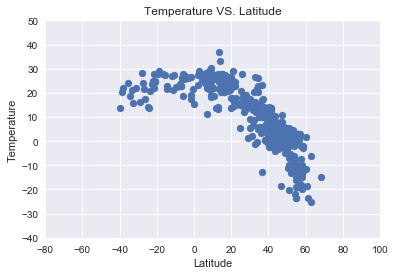

In [7]:
#Temperature Vs Latitude
sns.set()
plt.scatter(random_sample_df["Latitude"], random_sample_df["Current Temperature"])
plt.title("Temperature VS. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(-80,100)
plt.ylim(-40, 50)
plt.savefig("temp_vs_lat.png")
plt.show()

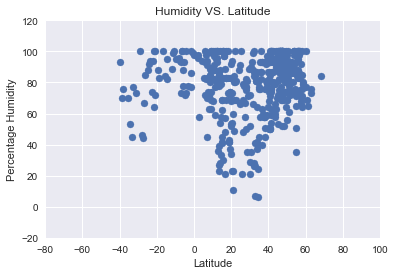

In [8]:
#Humidity % VS Latitude
plt.scatter(random_sample_df["Latitude"], random_sample_df["Current Humidity"])
plt.title("Humidity VS. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Percentage Humidity")
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.savefig("humidity_vs_lat.png")
plt.show()

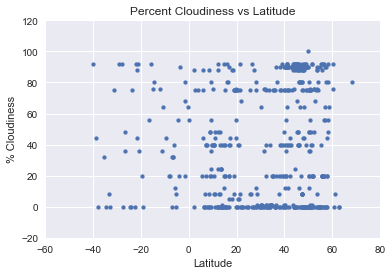

In [9]:
# Cloudiness % VS Latitude
plt.scatter(random_sample_df["Latitude"], random_sample_df["Current Cloudiness"], s=15)
plt.title("Percent Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.xlim(-60,80)
plt.ylim(-20,120)
plt.savefig("cloudiness_vs_lat")
plt.show()

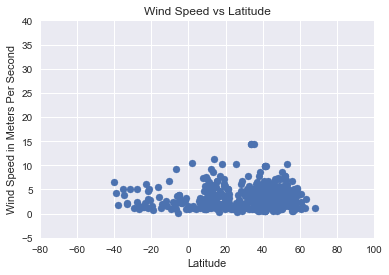

In [10]:
#Wind Speed VS Latitude
plt.scatter(random_sample_df["Latitude"], random_sample_df["Current Wind Speed"])
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in Meters Per Second")
plt.xlim(-80,100)
plt.ylim(-5, 40)
plt.savefig("windspeed_vs_lat")
plt.show()

In [11]:
random_sample_df.to_csv(path_or_buf="random_global_weather.csv")